In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
css = open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [7]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 14
Carmen                  14
The Three Musketeers    12
Blood Money             11
She                     11
The Outsider            11
Maya                    11
Othello                 10
Borderline              10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [13]:
thirties =  titles[(titles.year >= 1930) & (titles.year < 1940) ]
thirties.year.value_counts()[:3]

1937    1185
1936    1127
1938    1115
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

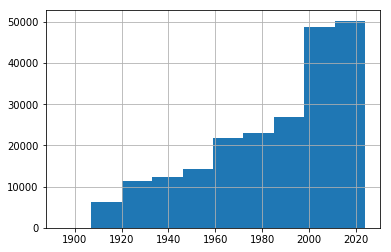

In [14]:
titles.year.hist()

In [33]:
titles['decade'] = titles.year //10 * 10

titles.head()

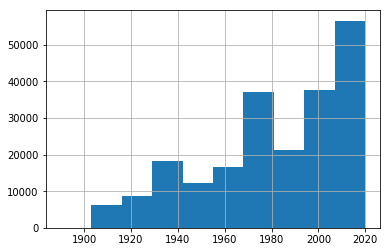

In [35]:
titles.decade.hist()

### Plot the number of "Hamlet" films made each decade.

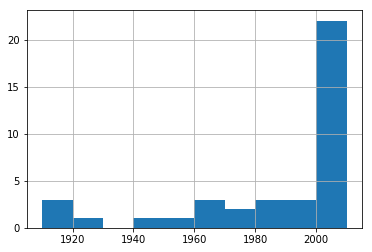

In [40]:
titles[titles.title.str.match('Hamlet')].decade.hist()

### Plot the number of "Rustler" characters in each decade of the history of film.

In [41]:
cast['decade'] = cast.year //10 * 10

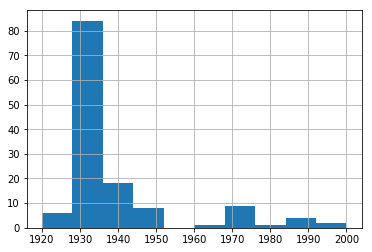

In [42]:
cast[cast.character.str.match('^Rustler$')].decade.hist()

### Plot the number of "Hamlet" characters each decade.

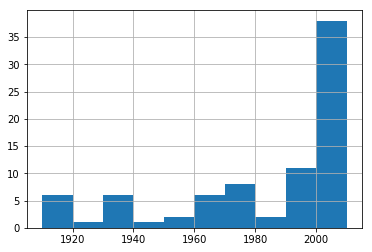

In [43]:
cast[cast.character.str.match('^Hamlet$')].decade.hist()

### What are the 11 most common character names in movie history?

In [44]:
cast.character.value_counts().head(11)

Himself        18926
Dancer         11015
Extra           8638
Reporter        7593
Doctor          6803
Policeman       6470
Student         6390
Nurse           6127
Bartender       6123
Minor Role      5830
Party Guest     5820
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [47]:
her = cast[cast.character.str.match('^Herself$', case=False)]

her.name.value_counts().head(10)

### Who are the 10 people most often credited as "Himself" in film history?

In [49]:
him = cast[cast.character.str.match('^Himself$', case=False)]

him.name.value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
Winston Churchill        20
Bill Clinton             20
Franklin D. Roosevelt    20
George W. Bush           20
Martin Luther King       19
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [8]:
# top 10 
cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     30
Harold Miller       28
Bess Flowers        28
Nolan Leary         27
Frank O'Connor      26
Tom London          24
Edmund Cobb         24
Charles Sullivan    24
Pierre Watkin       24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [9]:
# top 10 
cast[cast.year == 1985].name.value_counts().head(10)

Shakti Kapoor       19
Mammootty           17
Sukumari            16
Lou Scheimer        15
Aruna Irani         14
Raj Babbar          13
Deven Verma         13
Mohanlal            13
Rajesh Khanna       13
Satyendra Kapoor    12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

In [11]:
mamm = cast[cast.name.str.match('Mammootty')]
mamm.head()

,title,year,name,type,character,n
1258311,1993 Bombay March 12,2011,Mammootty,actor,Sathananda Bhatt,1.0
1258312,1993 Bombay March 12,2011,Mammootty,actor,Samir,1.0
1258313,Aa Neram Alppa Dooram,1985,Mammootty,actor,Jameskutty,1.0
1258314,Aa Rathri,1983,Mammootty,actor,Ravi,1.0
1258315,Aalkkoottathil Thaniye,1984,Mammootty,actor,Rajan,1.0


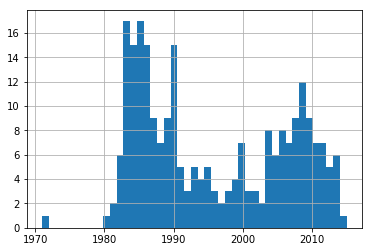

In [30]:
# bins are actor's carrer in years
mamm.year.hist(bins=45)

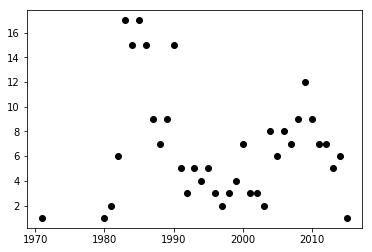

In [28]:
mamm.year.value_counts().sort_index().plot(style='ko')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [33]:
patrP = cast[cast.character.str.startswith('Patron in')]
patrP.head()

,title,year,name,type,character,n
18558,Let It Ride,1989,Ralph Ahn,actor,Patron in Chinese Restaurant,43.0
22641,Missing Pieces,2012,Rico Alago,actor,Patron in Restaurant,NaN
27062,The Black Bird,1975,John Alderman,actor,Patron in Ballroom,NaN
43673,The Mothman Prophecies,2002,Tony Amen,actor,Patron in Coffee Shop,NaN
80400,Striptease,1996,Marco Assante,actor,Patron in Club,49.0


In [34]:
patrP.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Restaurant             3
Patron in Club                   3
Patron in restaurant             3
Patron in cabaret                3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [35]:
patrS = cast[cast.character.str.startswith('Science')]
patrS.head()

,title,year,name,type,character,n
10616,Teen Wolf Too,1987,Matthew T. Adams,actor,Science Student,NaN
28987,Three O'Clock High,1987,Michael Alex,actor,Science Kid,25.0
35977,Fantastic Four,2015,Romeraux Allen,actor,Science Student,NaN
78684,Mutant Chronicles,2008,Roger Ashton-Griffiths,actor,Science Monk,13.0
122024,The Giggles,2013,Kevin Barnstein,actor,Science Performer 3,19.0


In [36]:
patrS.character.value_counts().head(10)

Science Teacher         53
Science Fair Student     8
Science Student          8
Science Fair Judge       6
Science Club Member      5
Science Reporter         5
Science Promo Cadet      4
Science Kid              4
Science Fair Kid         3
Science teacher          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

In [40]:
jD = cast[cast.name.str.contains('Judi Dench')]
jD.head()

,title,year,name,type,character,n
2483915,84 Charing Cross Road,1987,Judi Dench,actress,Nora Doel,3.0
2483916,A Handful of Dust,1988,Judi Dench,actress,Mrs. Beaver,13.0
2483917,A Midsummer Night's Dream,1968,Judi Dench,actress,Titania,16.0
2483918,A Room with a View,1985,Judi Dench,actress,"Eleanor Lavish, a novelist",7.0
2483919,A Study in Terror,1965,Judi Dench,actress,Sally,8.0


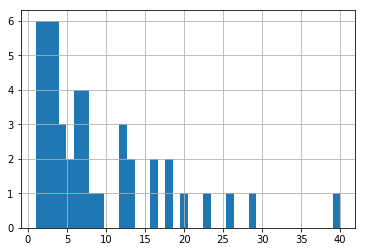

In [51]:
jD.n.hist(bins=40)

In [50]:
jD.groupby('year')['n'].value_counts()

year  n   
1964  12.0    1
1965  2.0     2
      8.0     1
1968  16.0    1
1974  2.0     1
      7.0     1
1985  3.0     1
      7.0     1
1987  3.0     2
1988  13.0    1
1989  26.0    1
1995  3.0     1
      6.0     1
1996  12.0    1
1997  1.0     1
      9.0     1
1998  12.0    1
1999  2.0     1
      6.0     1
2000  18.0    1
2001  3.0     2
2002  5.0     1
      6.0     1
2004  1.0     1
      4.0     1
      7.0     1
2005  1.0     1
      20.0    1
2006  1.0     1
      2.0     1
      4.0     1
      7.0     1
2008  4.0     1
2009  6.0     1
2011  1.0     1
      13.0    1
      16.0    1
      18.0    1
      23.0    1
2012  2.0     1
      29.0    1
      40.0    1
2013  1.0     1
2015  5.0     1
Name: n, dtype: int64

### Plot the n-values of Cary Grant's roles through his career.

In [52]:
cG = cast[cast.name.str.contains('Cary Grant')]
cG.head()

,title,year,name,type,character,n
773456,Alice in Wonderland,1933,Cary Grant,actor,Mock Turtle,10.0
773457,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1.0
773458,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0
773459,Big Brown Eyes,1936,Cary Grant,actor,Det. Sgt. Danny Barr,1.0
773460,Blonde Venus,1932,Cary Grant,actor,Nick Townsend,3.0


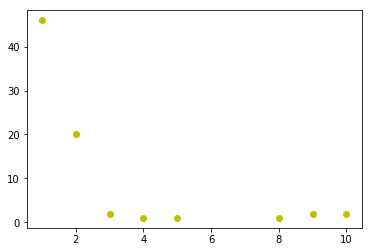

In [60]:
cG.n.value_counts().sort_index().plot(style='yo')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

In [61]:
sP = cast[cast.name.str.contains('Sidney Poitier')]
sP.head()

,title,year,name,type,character,n
1611275,A Patch of Blue,1965,Sidney Poitier,actor,Gordon Ralfe,1.0
1611276,A Piece of the Action,1977,Sidney Poitier,actor,Manny Durrell,1.0
1611277,A Raisin in the Sun,1961,Sidney Poitier,actor,Walter Lee Younger,1.0
1611278,A Warm December,1973,Sidney Poitier,actor,Dr. Matt Younger,1.0
1611279,All the Young Men,1960,Sidney Poitier,actor,Sgt. Eddie Towler,2.0


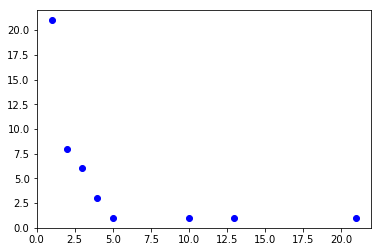

In [63]:
sP.n.value_counts().sort_index().plot(style='bo')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [64]:
# add decade column (int, i.e 1940)
cast['decade'] = cast.year //10 * 10

In [67]:
leads = cast[cast.n ==1]

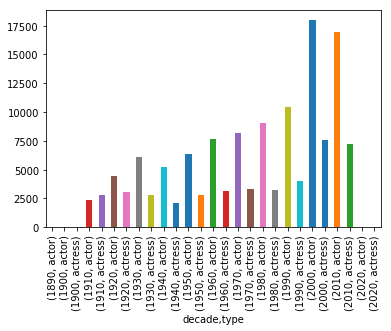

In [81]:
leads.groupby(['decade', 'type'])['n'].count().plot.bar()

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [72]:
snd = cast[cast.n == 2]

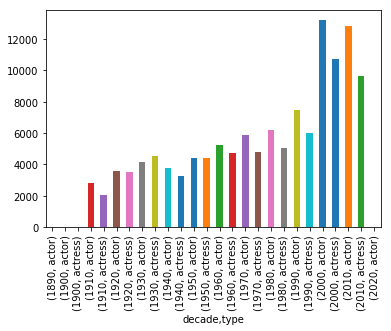

In [80]:
snd.groupby(['decade', 'type'])['n'].count().plot.bar()